In [3]:
!pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


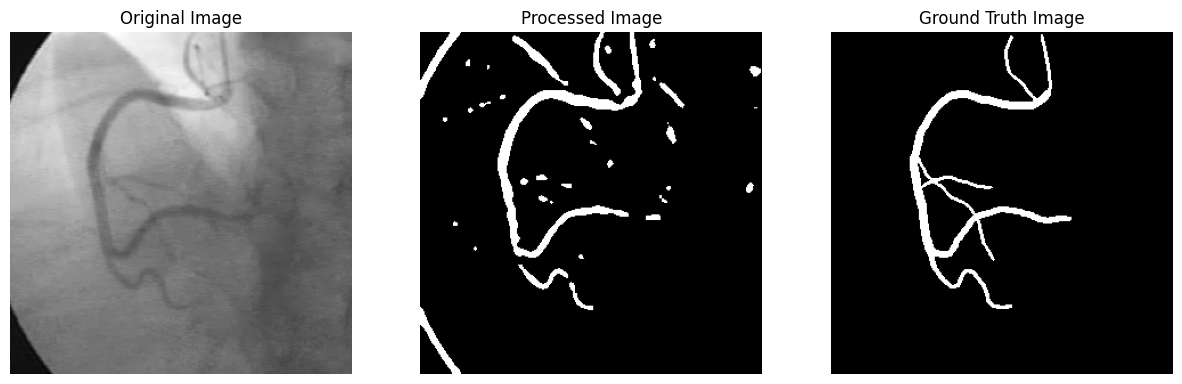

F1 Score: 0.6341620231461638


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

# Load the original and ground truth images
original_image = cv2.imread('./database/1.pgm', 0)
ground_truth_image = cv2.imread('./database/1_gt.pgm', 0)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(original_image, (9, 9), 0)

# Adaptive Gaussian Thresholding after blurring
binary_adaptive = cv2.adaptiveThreshold(
    blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

# Use morphological closing to close small holes, then opening to remove noise
kernel = np.ones((1,1), np.uint8)
closing = cv2.morphologyEx(binary_adaptive, cv2.MORPH_CLOSE, kernel, iterations=35)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel, iterations=5)

# Aplica el filtro de medianas después de las operaciones morfológicas
median_filtered = cv2.medianBlur(opening, 7)

# Invertir colores al final como se solicitó
inverted_binary = cv2.bitwise_not(median_filtered)

# Flatten the images for F1 score calculation
inverted_binary_flatten = inverted_binary.flatten() / 255
ground_truth_flatten = ground_truth_image.flatten() / 255

# Calculate F1 score
f1score_inverted = f1_score(ground_truth_flatten, inverted_binary_flatten)

# Plot the original, inverted binary (after all processing) and ground truth images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(inverted_binary, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ground_truth_image, cmap='gray')
plt.title('Ground Truth Image')
plt.axis('off')

plt.show()

# Output the new F1 score
print(f'F1 Score: {f1score_inverted}')
